<a href="https://colab.research.google.com/github/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preparando ambiente para realizar a análise**

---
**Objetivo**


*  Conectar na plataforma Kaggle com o Google Colab.

---
**Passo a passo**

1.   Criar um token para utilzar a API do Kaggle, retornando um aquivo .json e realizar o upload desse arquivo para o colab.

  *   é um arquivo de configuração que contém minhas credênciais de API do Kaggle.
  *   essas credênciais permitem que você se autentique na API do Kaggle e faça downloads de datasets diretamente do Kaggle.

2.   Usa o comando ***'pip install kaggle -q'*** para instalar a biblioteca 'Kaggle', que é uma interface Python para a API do Kaggle.
  *   é o que permite o acesso aos datasets.
  *   o argumento '-q' é abreviação de "quiet", e faz com que o comando pip simplifique a saída de informações durante o processo de instalação.

3. É necessario criar uma pasta que armazene o arquivo kaggle.json para que seja possível realizar o acesso a API. Foi feito:

  *   Criação da pasta.
  *   Movimentação do arquivo .json para a pasta criada.
  *   Atribuir uma permissão para a pasta criada.
  *   Essa pasta não é visivel no painel de arquivos do Colab, mas ainda sim é manipulavel via comandos do sheel.
     * !ls -la ~/.kaggle (listar conteudo do diretório).


4. Agora será feito o dowload do dataset que sera trabalhado nessa análise.


5. Realizando o unzip no dataset encontrado.
  - /content/titanic

1.   Upload do kaggle.json

In [ ]:
from google.colab import files
uploaded = files.upload()

---

2.   Instalando a biblioteca Kaggle

In [2]:
pip install kaggle -q

---



3.   Criando a pasta

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

---


4.   Dowload do dataset

In [ ]:
%cd /content/

!kaggle competitions download titanic

---


5.   Realizando unzip

In [ ]:
!unzip titanic.zip -d titanic



---



# **Quem é mais provável sobreviver ao titanic ?**

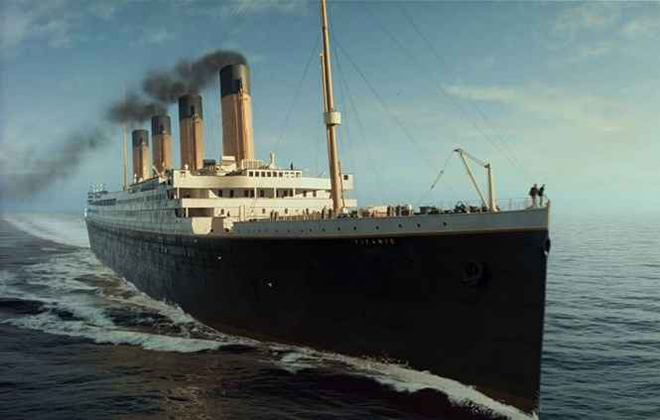

- O objetivo é usar  aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.
- O resultado é avaliado através da **Acurácia**.

- Descrição do dataset
  - **PassengerId**: Id do passageiro
  - **Survived**:  (0) - No,  (1) - Yes
  - **Pclass** (Ticket da classe): 1 = 1st, 2 = 2nd, 3 = 3rd
  - **Name**: Nome
  - **Sex**: Sexo
  - **Age**: Idade
  - **SibSp**: Quantidade de irmãos/cônjuges a bordo
  - **Parch**: Quantidade de pais/filhos a bordo
  - **Ticket**: Número do ticket
  - **Fare**: Tarifa de passageiros
  - **Cabin**: Número da cabine
  - **Embarked**: Porto aonde embarcou ( C = Cherbourg, Q = Queenstown, S = Southampton)
    

# Importando e fazendo o tratamento na base de dados

- Será replicado a mesma coisa feita na [**primeira**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e na [**segunda**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) parte dessa análise (para mais detalhes acesso esses links)

In [6]:
# Importando o pandas

import pandas as pd

In [23]:
# Visualizando a base de treino

treino = pd.read_csv('/content/titanic/train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# Visualizando a base de teste

teste = pd.read_csv('/content/titanic/test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Realizando os mesmos tratamentos iniciais feitos na [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e na [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb)

In [25]:
# Eliminando as colunas com elevada cardinalidade

treino = treino.drop(['Name','Ticket','Cabin'],axis=1)

teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

In [26]:
# Usando a média para substituir valores nulos na coluna de idade

treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()

teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

In [27]:
# Tratando a coluna Embarked da base de treino usando a moda

treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

# Tratando a coluna Fare da base de teste usando a média

teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

In [28]:
# Usando uma lambda function para fazer esse tratamento (na base de treino e na base de teste)

treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

- Agora, para tratar a coluna Embarked irei usar o **[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)** que irá criar uma nova coluna para cada um dos rótulos da coluna original.

In [29]:
# Criando o encoder e fazendo o fit com os dados

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')
ohe = ohe.fit(treino[['Embarked']])

In [30]:
# Transformando os dados e atualizando a base de treino com os novos valores

ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())

treino = pd.concat([treino,ohe_df],axis=1)

- Agora iremos fazer o mesmo para a base de teste usando o encoder ohe que criamos acima.

In [31]:
# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())

# Adicionando o resultado na base de teste

teste = pd.concat([teste,ohe_df],axis=1)

In [33]:
# Podemos então apagar essas duas colunas que já foi tratada

treino = treino.drop(['Sex','Embarked'],axis=1)

teste = teste.drop(['Sex','Embarked'],axis=1)

- Agora que todas as colunas de texto foram tratadas, vamos utilizar esses novos dados para treinar nossos modelos e verificar se ouve alguma melhoria em relação a [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) da análise.

In [34]:
# Visualizando a base

treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


- Podemos já utilizar essa base no modelo para efeitos de comparação com as melhorias que vamos fazer abaixo



---



# Ajustes nos dados na tentativa de obter uma melhora no resultado (Início da terceira parte da análise)

[Ir para a Seção 1](#section1)




# Usando essa nova base no modelo



In [35]:
# Visualizando a base

treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


- Igual visto anteriormente na [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) da análise.

**Árvore de Decisão**

- https://scikit-learn.org/stable/modules/tree.html#classification


**Classificação dos vizinhos mais próximos (KNN)**

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


**Regressão Logística**

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression



Antes de usar os algoritmos, precisamos separar a base de treino em treino e validação. Vamos fazer isso utilizando o train_test_split.

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [37]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)

y = treino.Survived

In [38]:
# Separando em treino e validação

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

<a id="section1"></a>
##teste
- Para a **Árvore de Decisão (ad)**

In [39]:
# Fazendo a importação
from sklearn import tree

In [40]:
# Criando o classificador

clf_ad = tree.DecisionTreeClassifier(random_state=42)

In [41]:
# Fazendo o fit com os dados

clf_ad = clf_ad.fit(X_train,y_train)

In [42]:
# Fazendo a previsão

y_pred_ad = clf_ad.predict(X_val)

- **Para a Classificação dos vizinhos mais próximos (KNN)**

In [43]:
# Fazendo importação
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Criando o classificador

clf_knn = KNeighborsClassifier(n_neighbors=3)

In [45]:
# Fazendo o fit com os dados

clf_knn = clf_knn.fit(X_train,y_train)

In [46]:
# Fazendo a previsão

y_pred_knn = clf_knn.predict(X_val)

- **Para a Regressão Logística (rl)**

In [47]:
# Fazendo importação
from sklearn.linear_model import LogisticRegression

In [48]:
# Criando o classificador

clf_rl = LogisticRegression(random_state=42,max_iter=1000)

In [49]:
# Fazendo o fit com os dados

clf_rl = clf_rl.fit(X_train,y_train)

In [50]:
# Fazendo a previsão

y_pred_rl = clf_rl.predict(X_val)

# Avaliando os modelos da mesma maneira

Para fazer essa análise, podemos usar:

- **Acurácia** (método de avaliação usado na competição):

  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- **Matriz de confusão** (ajuda a visualizar a distribuição dos erros):
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Lembrando que é importante avaliar o modelo em um conjunto de dados que não foi usado para criar o modelo. Isso é importante para evetarmos o que comulmente é chamado de **Overfitting**
- É quando o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado, perdendo assim a capacidade de **Generalização**.



In [51]:
# Importando
from sklearn.metrics import accuracy_score

In [52]:
# Para a árvore
acuracia_ad = accuracy_score(y_val, y_pred_ad)
print(f'Acúracia Árvore de Decisão: {acuracia_ad * 100:.3f}%')

# Para o knn
acuracia_knn = accuracy_score(y_val, y_pred_knn)
print(f'Acúracia KNN: {acuracia_knn * 100:.3f}%')

# Para a regressão logística
acuracia_rl = accuracy_score(y_val, y_pred_rl)
print(f'Acúracia Regressão Logística: {acuracia_rl * 100:.3f}%')

Acúracia Árvore de Decisão: 74.915%
Acúracia KNN: 71.525%
Acúracia Regressão Logística: 81.695%


- Irei salvar esses valores em um DataFrame para visualizar se houve ou não alguma evolução em comparação a [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) da análise.

In [53]:
# Criando um DataFrame

as_df = pd.DataFrame({
    'Modelos': ['Árvore de Decisão','KNN','Regressão Logística'],
    'Inicial': [acuracia_ad,acuracia_knn,acuracia_rl]
})

as_df

,Modelos,Inicial
0,Árvore de Decisão,0.749153
1,KNN,0.715254
2,Regressão Logística,0.816949


In [ ]:
# Adicionando novas colunas

In [ ]:
# Visualizando

- Avaliando a **Matriz de Confusão**

In [54]:
# Importando
from sklearn.metrics import confusion_matrix

In [55]:
# Para a árvore
matriz_confusao_ad = confusion_matrix(y_val, y_pred_ad)

# Para o knn
matriz_confusao_knn = confusion_matrix(y_val, y_pred_knn)

# Para a regressão logística
matriz_confusao_rl = confusion_matrix(y_val, y_pred_rl)

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Função para o plot

def plot_confusion_matrix(matriz, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(title, fontsize=18)
    plt.xlabel('Previsto', fontsize=16)
    plt.ylabel('Real', fontsize=16)
    plt.show()

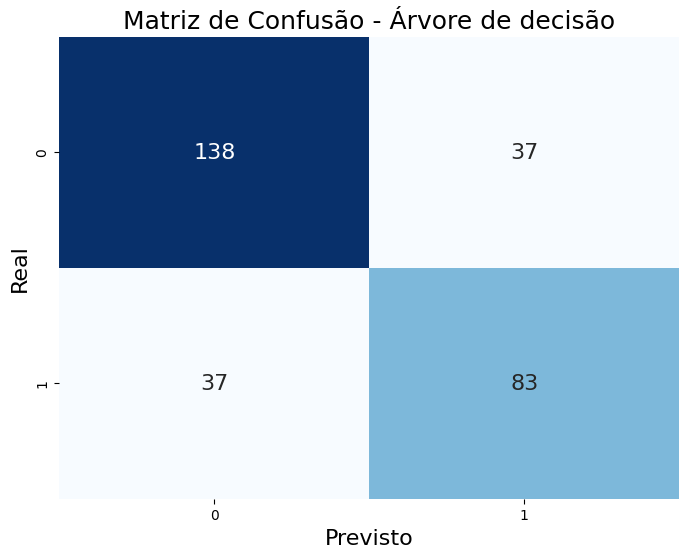

In [57]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_ad, 'Matriz de Confusão - Árvore de decisão')

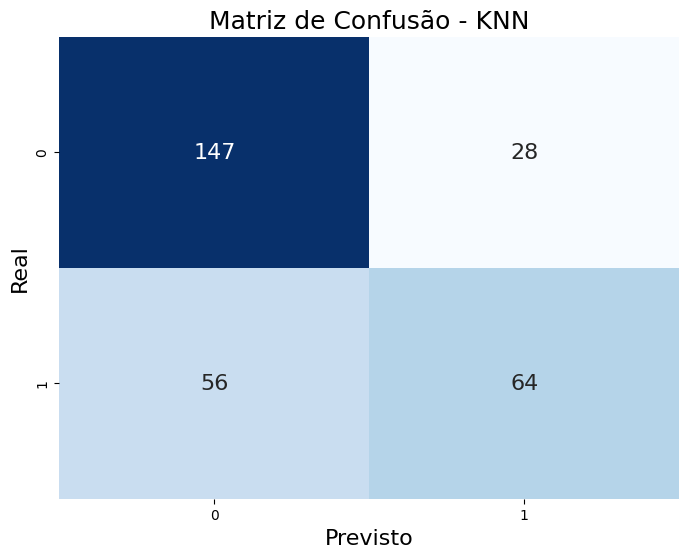

In [58]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_knn, 'Matriz de Confusão - KNN')

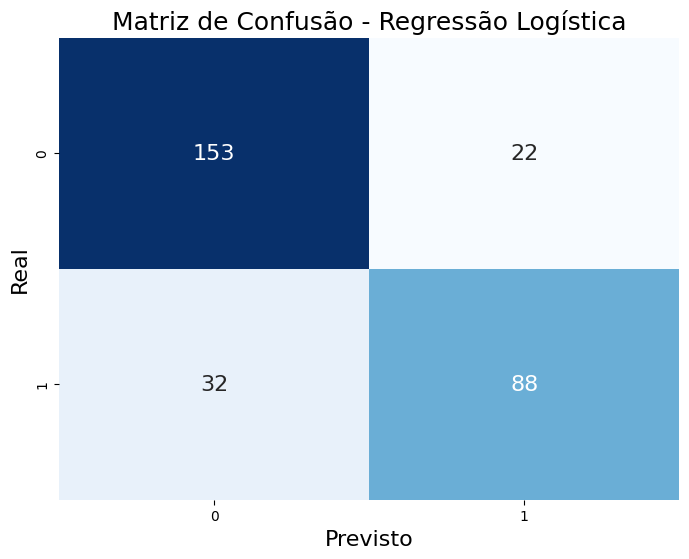

In [59]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_rl, 'Matriz de Confusão - Regressão Logística')